In [22]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

In [23]:
df = pd.read_csv("HousingData.csv")

1 crim: Per capita crime rate by town.\
\
2 zn: Proportion of large residential lots (over 25,000 sq. ft.).\
\
3 indus: Proportion of non-retail business acres per town.\
\
4 Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).\
\
5 nox: Concentration of nitrogen oxides in the air.\
\
6 rm: Average number of rooms per dwelling.\
\
7 age: Proportion of old owner-occupied units built before 1940.\
\
8 dis: Weighted distances to Boston employment centers.\
\
9 rad: Index of accessibility to radial highways.\
\
10 tax: Property tax rate per $10,000.\
\
11 PTRATIO - Pupil-teacher ratio by town.\
\
12 B - 1000(Bk - 0.63)^2 where Bk is the proportion of black residents by town.\
\
13 LSTAT - % lower status of the population.\
\
14 MEDV - Median value of owner-occupied homes in $1000's
\
\
These features provide valuable information about the characteristics of neighborhoods that can influence housing prices.

In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Data Exploaration and Cleaning

In [25]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695   

506 entries\
CRIM, ZN, INDUS, CHAS, AGE, LSTAT: These columns have missing values as their non-null count is less than 506.


In [26]:
print(df.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


## Visualize the data

In [27]:
import seaborn as sns

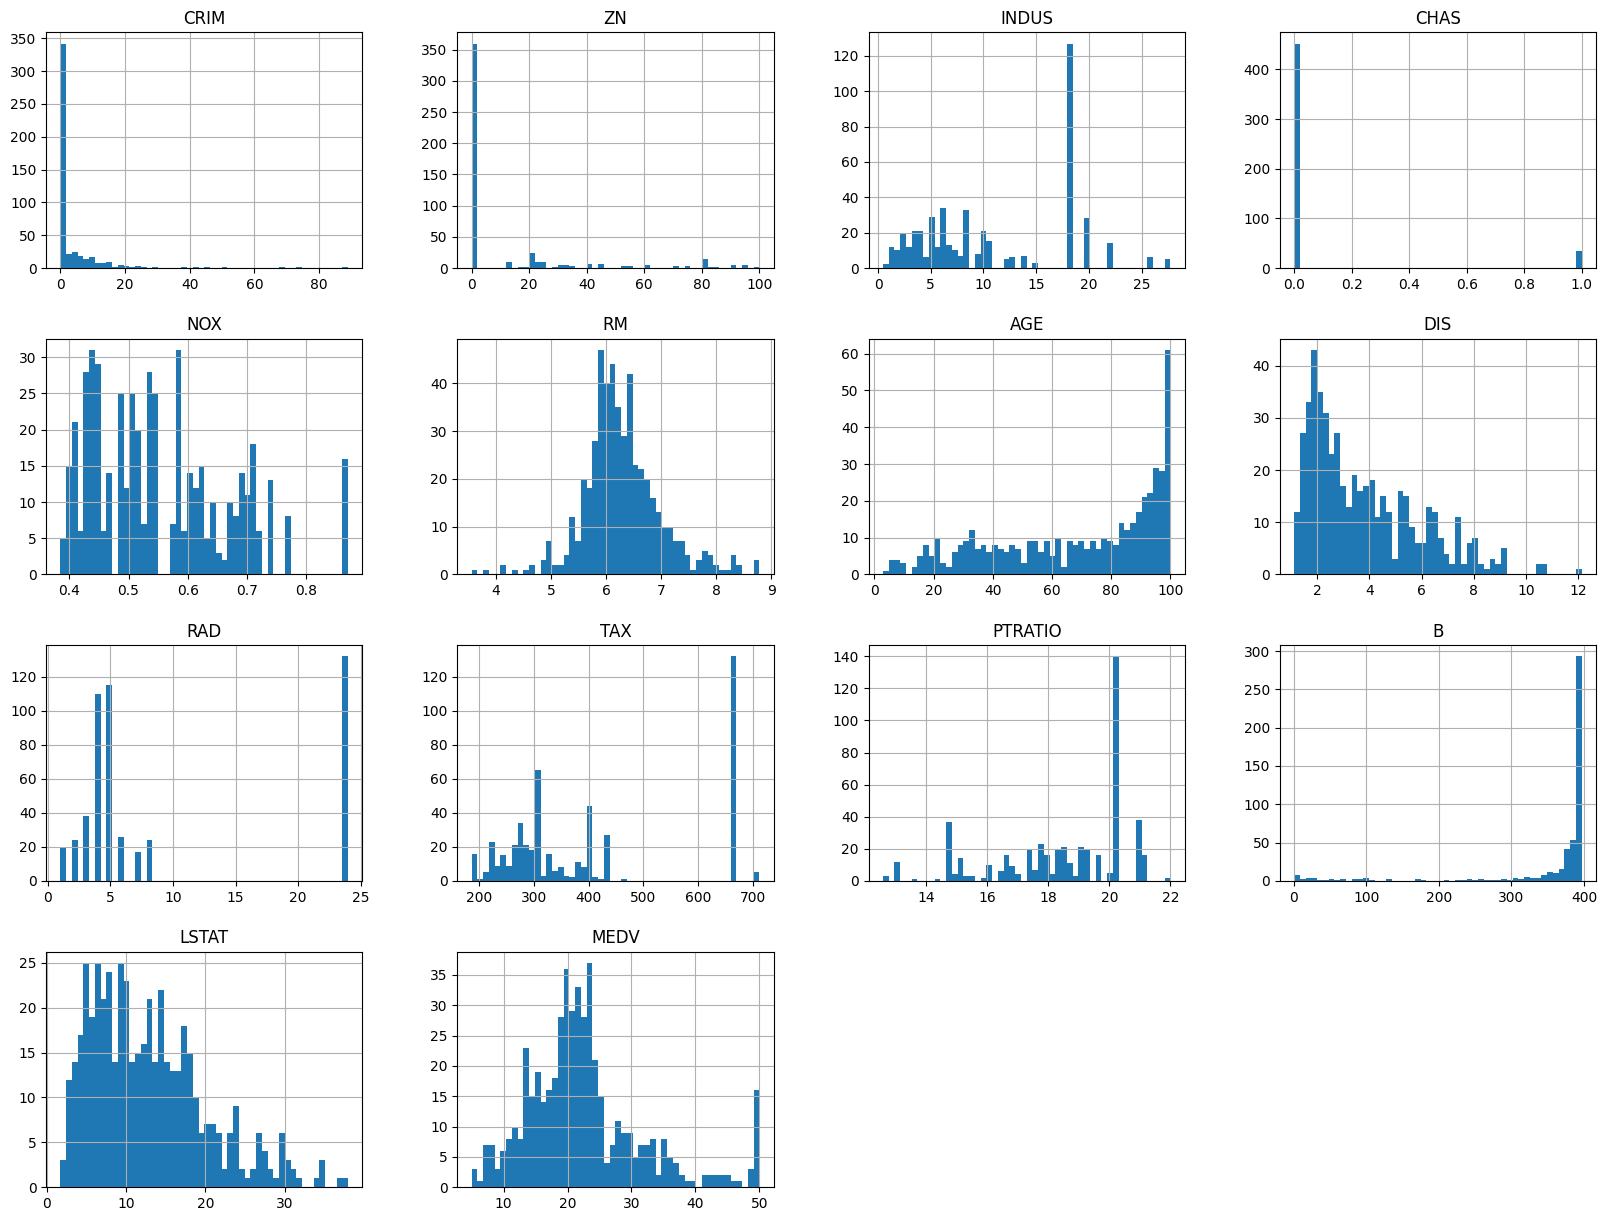

In [28]:
df.hist(bins=50, figsize=(20,15))
plt.show()

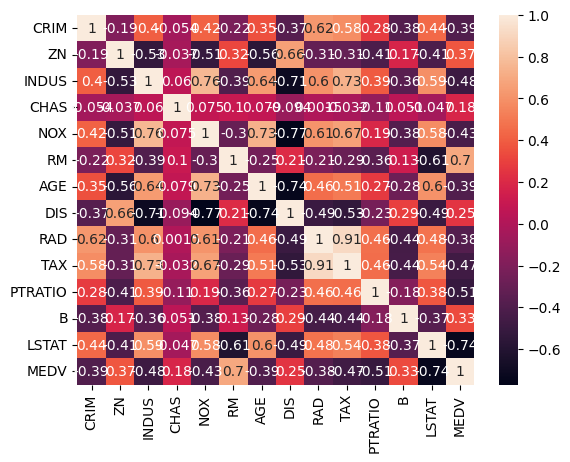

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


In [30]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

print(corr_matrix['MEDV'].sort_values(ascending=False))

From these plots, I would consider anything bigger than 0.5 or lower than -0.5 as a contributer\

In this case it would be LSTAT, PTRATIO & RM

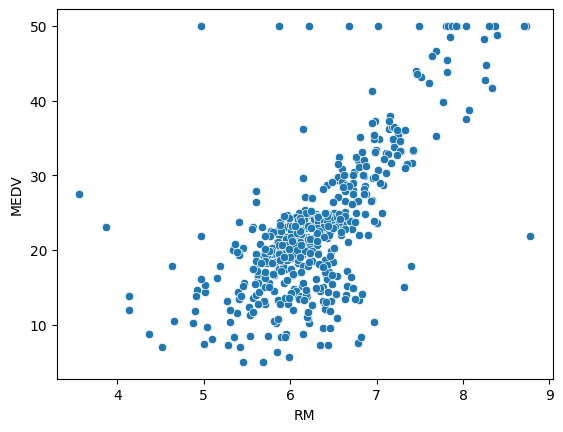

In [31]:
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.show()

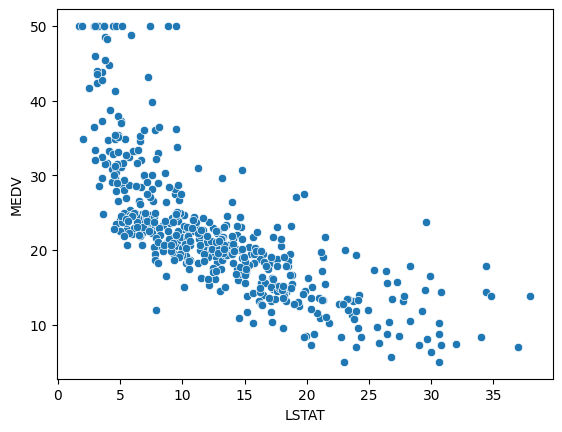

In [33]:
sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.show()

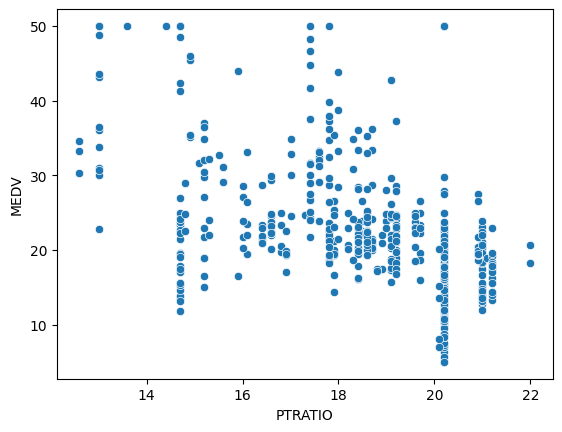

In [32]:
sns.scatterplot(x='PTRATIO', y='MEDV', data=df)
plt.show()

RM and LSTAT show a strong correlation however, PTRATIO is scattered.

## Cleaning Data

In [ ]:
df['RM'].fillna(df)

# Assuming 'RM' has missing values
df['RM'].fillna(df['RM'].mean(), inplace=True)